In [1]:
%matplotlib widget
import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt
import coordinates as coord 
from matplotlib import cm # for colormaps
import attitude as att # this is new!
from scipy.integrate import odeint # this is new!

RuntimeError: 'widget is not a recognised GUI loop or backend name

## Useful constants

In [27]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

## Define principal moments of inertia

In [28]:
A = 1
B = np.sqrt(2)
C = 2

## Euler equations. It is a system of ODEs. Here, we need to define a function that outputs derivatives

\begin{gather}
A\dot{\omega_a} = (B - C)  \omega_b  \omega_c\\
B\dot{\omega_b} = (C - A)  \omega_c  \omega_a\\
C\dot{\omega_c} = (A - B)  \omega_a  \omega_b
\end{gather}

In [4]:
# function that returns dy/dt
def euler_ode(omega,t):
    omega_a = omega[0]
    omega_b = omega[1]
    omega_c = omega[2]
    
    dwa_dt = (B - C) * omega_b * omega_c / A
    dwb_dt = (C - A) * omega_c * omega_a / B
    dwc_dt = (A - B) * omega_a * omega_b / C
    
    return np.array([dwa_dt, dwb_dt, dwc_dt])

#### Let's implement the simplest integrator. Guess who it's named after.

Euler first-order integrator can be derived by looking at the first term of the taylor series expansion:
$y(t) = y(t_0) + \frac{\partial y(t)}{\partial t} (t - t_0)$ + $\textit{higher order terms}$. Thus, we can write: $y_{i+1} \approx y_i + \dot{y}_i(t) \Delta t$

In [29]:
# simplest integrator
def euler_integrator(ode, y_initial, t):
    dt     = np.diff(t)
    y      = np.zeros((len(t), len(y_initial)))
    y[0,:] = np.array(y_initial)
    for i in range(len(t) - 1):
        y[i + 1,:] = y[i, :] + ode(y[i, :], t[i]) * dt[i]
    return y

## We need to define two things: 
1) the initial conditions;
2) the independent variable for the intergration, which in this case is time, so we need to define at what times we want the solution to be evaluated.

In [33]:
# initial condition
omega_initial = [0.0, 1.0, 1e-3]

# time points
t = np.linspace(0,150,1000)

# solve ODE
omega = euler_integrator(euler_ode, omega_initial, t)

# extract angular velocities
omega_a = omega[:,0]
omega_b = omega[:,1]
omega_c = omega[:,2]

# compute angular momenta
L_a = A * omega_a
L_b = B * omega_b
L_c = C * omega_c

# compute total angular momentum and kinetic energy (they better be constant)
L = np.sqrt(L_a ** 2 + L_b ** 2 + L_c ** 2)
E = L_a ** 2 / (2 * A) + L_b ** 2 / (2 * B) + L_c ** 2 / (2 * C)

## Ok, now that we have integrated the Euler equations, we want to visualize the solution. Let's plot angular velocities

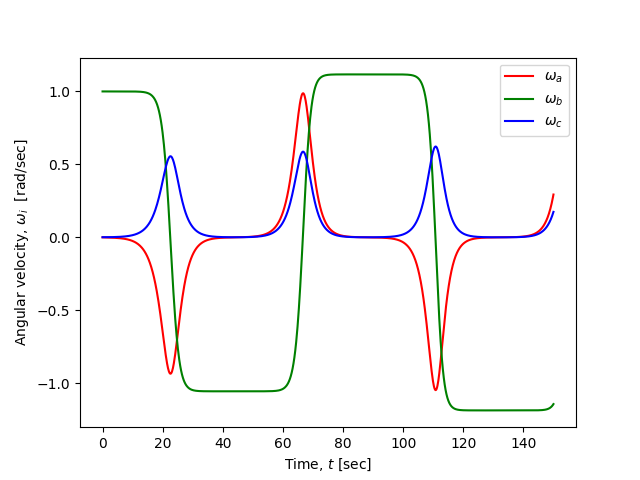

In [34]:
plt.figure()
plt.plot(t, omega_a,'-r',label=r'$\omega_a$')
plt.plot(t, omega_b,'-g',label=r'$\omega_b$')
plt.plot(t, omega_c,'-b',label=r'$\omega_c$')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Angular velocity, $\omega_i$  [rad/sec]')
plt.legend(loc='upper right')

## Plot angular momentum change

Text(0, 0.5, 'Angular momentum magnitude change, $(L-L_0)/L_0$  []')

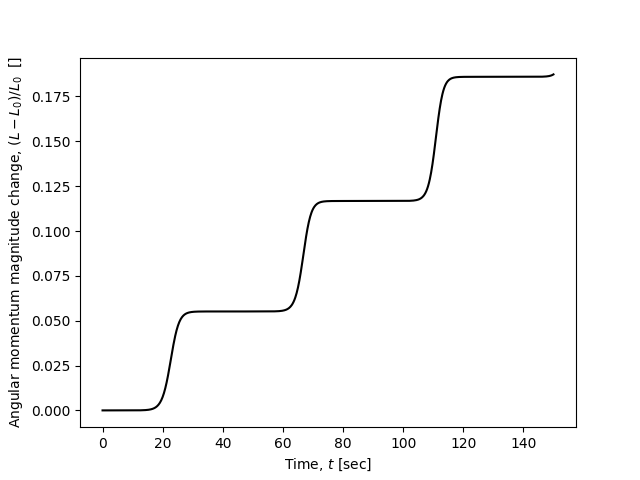

In [35]:
plt.figure()
plt.plot(t, (L - L[0])/L[0],'-k')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Angular momentum magnitude change, $(L-L_0)/L_0$  []')

## Plot energy change

Text(0, 0.5, 'Kinetic energy change, $(E-E_0)/E_0$ []')

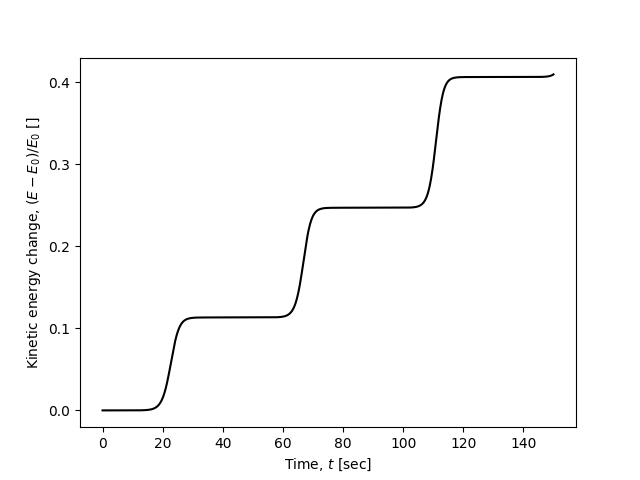

In [36]:
plt.figure()
plt.plot(t, (E-E[0])/E[0],'-k')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Kinetic energy change, $(E-E_0)/E_0$ []')

## Let's try a different integrator. Let's use the one from the scipy package. We are using "odeint" function to intergrate Euler equations. We need to define three things: 
1) the initial conditions;
2) the independent variable for the intergration, which in this case is time, so we need to define at what times we want the solution to be evaluated;
3) accuracy parameters of the intergration. There are two variables we define here: absolute and relative tolerance. 

In [38]:
# initial condition
omega_initial = [0.0, 1.0, 1e-3]

# time points
t = np.linspace(0,150,1000)

# absolute tolerance
atol = 1e-12

# relative tolerance
rtol = 1e-12

# solve ODE
omega = odeint(euler_ode, omega_initial, t, rtol=rtol, atol=atol)

# extract angular velocities
omega_a = omega[:,0]
omega_b = omega[:,1]
omega_c = omega[:,2]

# compute angular momenta
L_a = A * omega_a
L_b = B * omega_b
L_c = C * omega_c

# compute total angular momentum and kinetic energy
L = np.sqrt(L_a ** 2 + L_b ** 2 + L_c ** 2)
E = L_a ** 2 / (2 * A) + L_b ** 2 / (2 * B) + L_c ** 2 / (2 * C)

## Let's first plot the angular velocities.

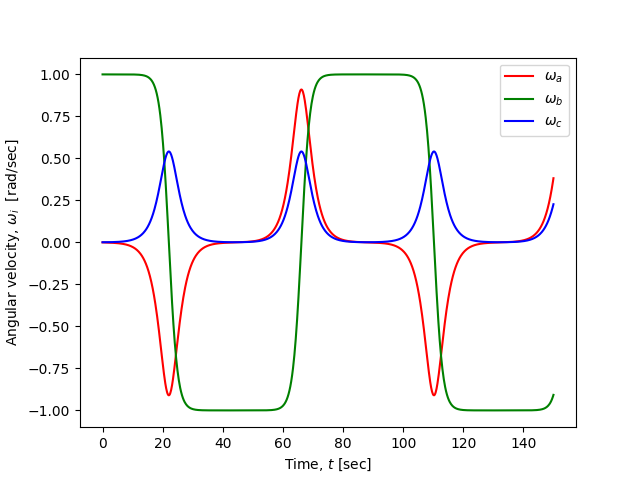

In [39]:
plt.figure()
plt.plot(t, omega_a,'-r',label=r'$\omega_a$')
plt.plot(t, omega_b,'-g',label=r'$\omega_b$')
plt.plot(t, omega_c,'-b',label=r'$\omega_c$')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Angular velocity, $\omega_i$  [rad/sec]')
plt.legend(loc='upper right')

## Now, let's check angular momentum.

Text(0, 0.5, 'Angular momentum magnitude change, $(L-L_0)/L_0$  []')

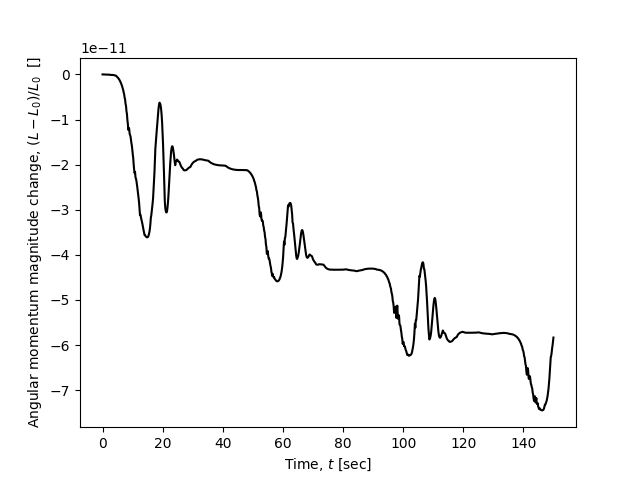

In [41]:
plt.figure()
plt.plot(t, (L - L[0])/L[0],'-k')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Angular momentum magnitude change, $(L-L_0)/L_0$  []')

## and energy

Text(0, 0.5, 'Kinetic energy change, $(E-E_0)/E_0$ []')

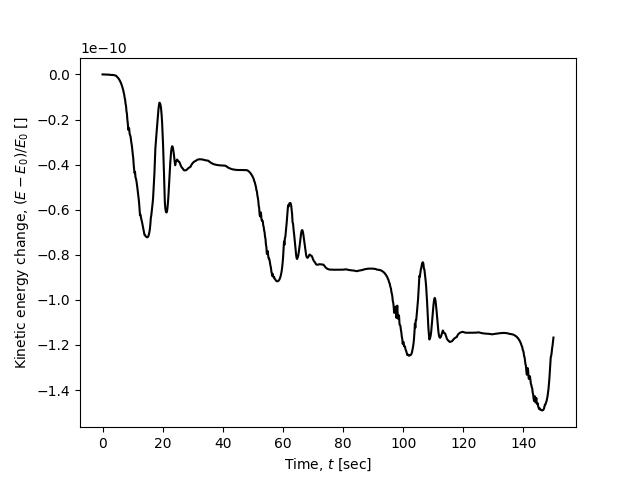

In [42]:
plt.figure()
plt.plot(t, (E-E[0])/E[0],'-k')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Kinetic energy change, $(E-E_0)/E_0$ []')

We can see that energy and angular momentum do change becasue of the numerical errors in the integrator. But they are much much smaller compared to the simplest first-order Euler integrator. To further reduce errors, we can 
1) change the integrator accuracy parameters (atol and rtol)
2) use other types of integrators that are particularly suited for our problem
3) sometimes, we can rewrite the system of equations to get a more stable and accurate solution. A common technique is to introduce so sort of normalized variables. 

## Remember this weird-looking figure showing the intersection of the angular momentum sphere and energy ellipsoid. We can now see if we can recover it from the results of the integration.

Let's start simple. Let's just plot one trajectory.

Text(0.5, 0, '$L_z$ [kg m$^2$ / sec]')

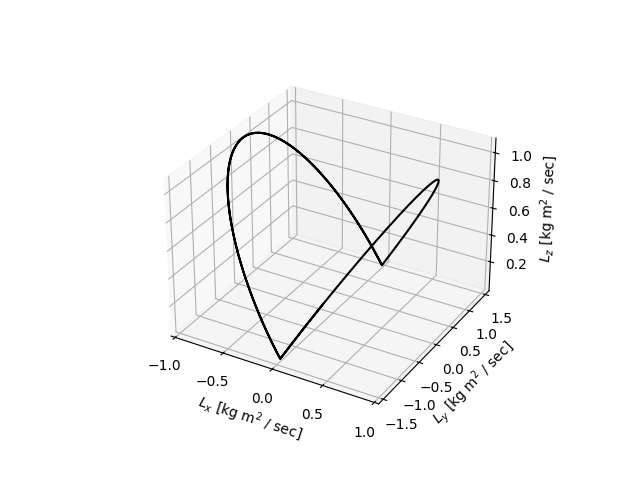

In [43]:
# Plot the surface of constant angular momentum
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.plot(L_a, L_b, L_c, '-k', markersize=1.0)
ax.set_xlabel(r'$L_x$ [kg m$^2$ / sec]')
ax.set_ylabel(r'$L_y$ [kg m$^2$ / sec]')
ax.set_zlabel(r'$L_z$ [kg m$^2$ / sec]')

## Ok, now we can try to fill the angular momentum sphere with many trajectories that all start from different points. So, we need to create many different initial conditions, intergrate from them and the plot the results. 

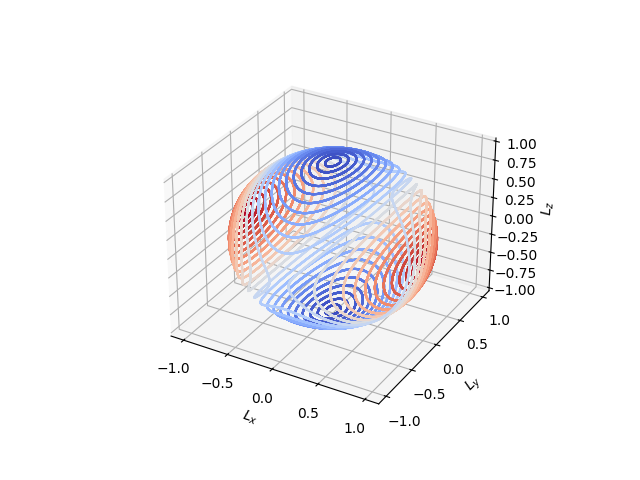

In [44]:
# again let's assume that the angular momentum sphere has a radius of 1.0
L      = 1.0

# define initial positions of the trajectories in spherical coordinates
n_trajectories = 50
lat            = np.linspace(-pi/2, pi/2, n_trajectories)
lon            = np.array([0, pi])
lon, lat       = np.meshgrid(lon,lat)

# convert initial positions to the Cartesian coordinates
L_a_initial, L_b_initial, L_c_initial = coord.sph2cart(lon,lat,L)

# time points for the integration
t = np.linspace(0,100,500)

# compute minimum and maximum energies
E_min = L / (2 * C)
E_max = L / (2 * A)

cmap = plt.colormaps.get_cmap('coolwarm')

# create a plotting enviroment.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel(r'$L_x$')
ax.set_ylabel(r'$L_y$')
ax.set_zlabel(r'$L_z$')

# run a loop over latitude and longitude. integration is done inside the loop
for i in range(lon.shape[0]):
    for j in range(lon.shape[1]):
        # initial condition
        omega_initial = [L_a_initial[i,j] / A, L_b_initial[i,j] / B, L_c_initial[i,j] / C]
        
        # solve Euler equations
        omega = odeint(euler_ode, omega_initial, t, rtol=1e-12, atol=1e-12)

        # extract angular velocities
        omega_a = omega[:,0]
        omega_b = omega[:,1]
        omega_c = omega[:,2]

        # extract angular momenta
        L_a = A * omega_a
        L_b = B * omega_b
        L_c = C * omega_c

        # compute kinetic energy
        E = L_a_initial[i,j] ** 2 / (2 * A) + L_b_initial[i,j] ** 2 / (2 * B) + L_c_initial[i,j] ** 2 / (2 * C)

        # get the color
        scaled_color = cmap((E - E_min) / (E_max - E_min))
        
        # plot angular momenta
        plt.plot(L_a, L_b, L_c, '-', markersize = 1, color = scaled_color)

## Ok, we are not done yet. The remaining part is to connect the angular velocities on the pricipal axes to some form of defining the orientation of the body with respect to its reference orientation. As we discussed in the class, we can do it with rotation matrices and a composition of rotations using Euler angles. However, there are other ways of doing it. We can choose a different set of rotations, or we can choose a different way of parameterizing orientation altogether.  

In [45]:
# function that returns dy/dt
def euler_euler_angles_ode(y,t):

    omega   = y[0:3]
    omega_a = omega[0]
    omega_b = omega[1]
    omega_c = omega[2]
    
    theta   = y[3]
    phi     = y[4]
    psi     = y[5]
    
    dwa_dt = (B - C) * omega_b * omega_c / A
    dwb_dt = (C - A) * omega_c * omega_a / B
    dwc_dt = (A - B) * omega_a * omega_b / C

    R = np.array([[np.cos(psi) * np.sin(theta) , -np.sin(psi) * np.sin(theta),  0.0],
                  [np.sin(psi)                 ,  np.cos(psi)                 , 0.0],
                  [-np.sin(psi) * np.cos(theta),  np.cos(psi) * np.cos(theta) , np.sin(theta)]])

    deuler_angles_dt = R @ omega / np.sin(theta)
    
    return [dwa_dt, dwb_dt, dwc_dt, deuler_angles_dt[0], deuler_angles_dt[1], deuler_angles_dt[2]]

## Integrate this new system of ODEs

In [46]:
# initial condition
omega_initial = [1.0, 0.1, 1.0]
theta_initial = 90  * deg2rad
phi_initial   = 0.0 * deg2rad
psi_initial   = 0.0 * deg2rad

state_initial = omega_initial + [theta_initial, phi_initial, psi_initial]

# time points
t = np.linspace(0,10,500)

# absolute tolerance
atol = 1e-12

# relative tolerance
rtol = 1e-12

# solve ODE
state = odeint(euler_euler_angles_ode, state_initial, t, rtol=rtol, atol=atol)

# extract angular velocities and Euler angles
omega_a = state[:,0]
omega_b = state[:,1]
omega_c = state[:,2]
theta   = state[:,3]
phi     = state[:,4]
psi     = state[:,5]

/var/folders/lp/nzbfjgh14nv_gzpg4ygpc3_m0000gn/T/ipykernel_72556/806935612.py:19: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  state = odeint(euler_euler_angles_ode, state_initial, t, rtol=rtol, atol=atol)


## Plot angular velocities like we did before

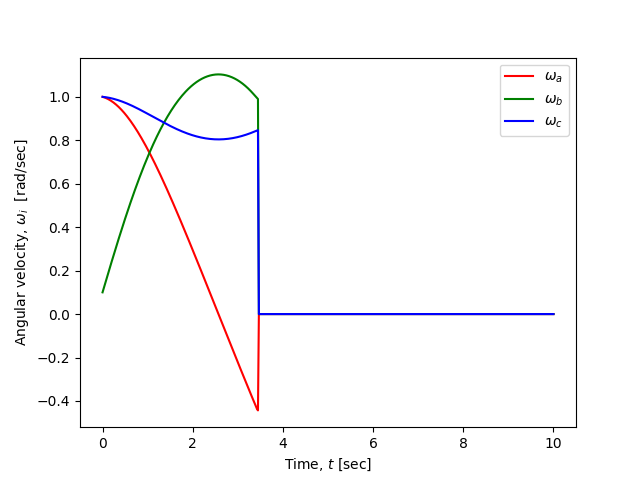

In [21]:
plt.figure()
plt.plot(t, omega_a,'-r',label=r'$\omega_a$')
plt.plot(t, omega_b,'-g',label=r'$\omega_b$')
plt.plot(t, omega_c,'-b',label=r'$\omega_c$')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Angular velocity, $\omega_i$  [rad/sec]')
plt.legend(loc='upper right')

## Hmmm, what happened? Let's look at the Euler angles to get an idea

/var/folders/lp/nzbfjgh14nv_gzpg4ygpc3_m0000gn/T/ipykernel_72556/1236737483.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


(0.0, 6.283185307179586)

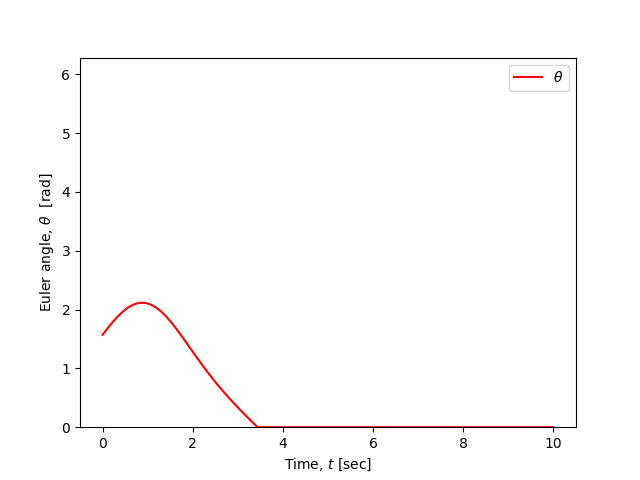

In [47]:
plt.figure()
plt.plot(t, theta,'-r',label=r'$\theta$')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'Euler angle, $\theta$  [rad]')
plt.legend(loc='upper right')
plt.ylim((0,2*pi))

Ok, now you probably see the problem with Euler angles. When the Euler angle $\theta$ became zero, we encouterted a singularity in the equations as the time derivative of Euler angles becomes infinite. Below is a better way, which avoids the singularity. It is using quaternions to define rotations. Think of an axis and an angle. A rotation of a body can be defined as with rotating it around a defined axis (not necesserily a coordinate axis) by an specific angle $\theta$. Then, we can define a quaternion $q$, which consists of four elements given below:

$q_0 = \mathrm{cos}(\frac{\theta}{2})$

$q_1 = u_x \cdot \mathrm{sin}(\frac{\theta}{2})$

$q_2 = u_y \cdot\mathrm{sin}(\frac{\theta}{2})$

$q_3 = u_z \cdot \mathrm{sin}(\frac{\theta}{2})$



In [48]:
# function that returns dy/dt
def euler_quaternion_ode(y,t):

    omega   = y[0:3]
    omega_a = omega[0]
    omega_b = omega[1]
    omega_c = omega[2]
    
    qw   = y[3]
    qx   = y[4]
    qy   = y[5]
    qz   = y[6]
    
    dwa_dt = (B - C) * omega_b * omega_c / A
    dwb_dt = (C - A) * omega_c * omega_a / B
    dwc_dt = (A - B) * omega_a * omega_b / C

    q_dot = 0.5 * np.array([[0.0, omega_c, -omega_b, omega_a],
                           [-omega_c, 0.0, omega_a, omega_b],
                           [omega_b, -omega_a, 0.0, omega_c],
                           [-omega_a, -omega_b, -omega_c, 0.0]]) @ np.array([qx, qy, qz, qw])
    
    return [dwa_dt, dwb_dt, dwc_dt, q_dot[3], q_dot[0], q_dot[1], q_dot[2]]

## Setting up the integration like before

In [49]:
# initial condition
omega_initial                   = [1.0, 1.0, -0.01]
theta_initial                   = 0.0
x_initial, y_initial, z_initial = coord.sph2cart(0,pi/2.0,1)

q0 = np.cos(theta_initial / 2)
q1 = x_initial * np.sin(theta_initial / 2)
q2 = y_initial * np.sin(theta_initial / 2)
q3 = z_initial * np.sin(theta_initial / 2)

state_initial = omega_initial + [q0, q1, q2, q3]

# time points
t = np.linspace(0,50,5000)

# absolute tolerance
atol = 1e-12

# relative tolerance
rtol = 1e-12

# solve ODE
state = odeint(euler_quaternion_ode, state_initial, t, rtol=rtol, atol=atol)

omega_a = state[:,0]
omega_b = state[:,1]
omega_c = state[:,2]
q0      = state[:,3]
q1      = state[:,4]
q2      = state[:,5]
q3      = state[:,6]

## Plotting one component of the quaternion

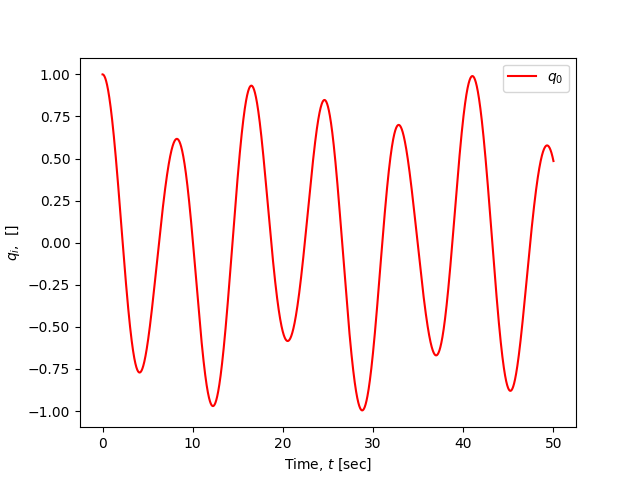

In [50]:
plt.figure()
plt.plot(t, q0,'-r',label=r'$q_0$')
plt.xlabel(r'Time, $t$ [sec]')
plt.ylabel(r'$q_i$,  []')
plt.legend(loc='upper right')